In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [37]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target_names[data.target]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [38]:
df.shape


(178, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [40]:
feature= df.iloc[:,:-1]
prediction = df.iloc[:,-1]
feature.head()
prediction.head()

0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: target, dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns = feature.columns)
feature_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [42]:
from sklearn.model_selection import train_test_split
x_train, y_train , x_test , y_test = train_test_split(feature_scaled,prediction,test_size=0.2,random_state=42)

In [43]:
Train_data = pd.concat([x_train, y_train],axis = 'columns')
Train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,-0.581338,2.848870,0.999674,1.653086,-0.262708,-0.809357,-1.434939,2.160669,-0.860096,-0.025128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,0.592164,-0.598156,0.999674,0.902373,-0.754202,0.488531,-0.932956,1.274310,1.224884,2.894719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0.085705,-0.750759,-0.974210,-1.199622,-0.122282,0.168065,0.613153,-0.659563,-0.387033,-0.587469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Train_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,-0.026600,0.033369,-0.020732,-0.006518,0.049296,-0.009659,-0.027265,0.049751,0.030012,-0.000209,...,0.025708,-0.194445,0.038098,0.107544,-0.196239,-0.118381,0.000826,0.018502,0.105122,0.150719
std,1.013060,1.026867,1.020635,1.037422,1.028681,1.021831,1.008153,1.033563,1.022614,1.008285,...,0.865524,0.879768,0.936725,0.988065,0.855879,0.924558,0.995044,0.914090,0.938236,1.149961
min,-2.434235,-1.298334,-3.679162,-2.671018,-2.088255,-2.107246,-1.695971,-1.868234,-2.051513,-1.435306,...,-1.349764,-1.526548,-1.514383,-1.535336,-1.545922,-2.069034,-1.634288,-1.699872,-1.852681,-1.343516
25%,-0.825303,-0.647528,-0.572122,-0.689137,-0.806862,-0.913509,-0.907857,-0.740141,-0.597284,-0.795103,...,-0.741687,-0.824415,-0.577019,-0.594117,-0.760286,-0.698028,-0.794021,-0.493354,-0.450831,-0.781453
50%,0.011589,-0.414135,-0.023821,-0.088567,-0.122282,0.023855,0.045912,-0.176095,-0.062898,-0.198156,...,0.091604,-0.262708,0.272216,0.281844,-0.417829,-0.080419,-0.068385,0.055064,0.265984,-0.213021
75%,0.836129,0.716920,0.634140,0.602088,0.509638,0.808997,0.816456,0.871420,0.659837,0.460432,...,0.527017,0.474532,0.829027,0.886734,0.408096,0.502149,0.585877,0.713164,0.806243,0.977183
max,2.259772,3.109192,3.156325,3.154511,4.371372,2.539515,3.062832,2.402403,3.485073,3.435432,...,1.653086,1.633052,1.610163,1.908270,2.160669,1.575301,2.094465,1.546759,1.706675,2.971473


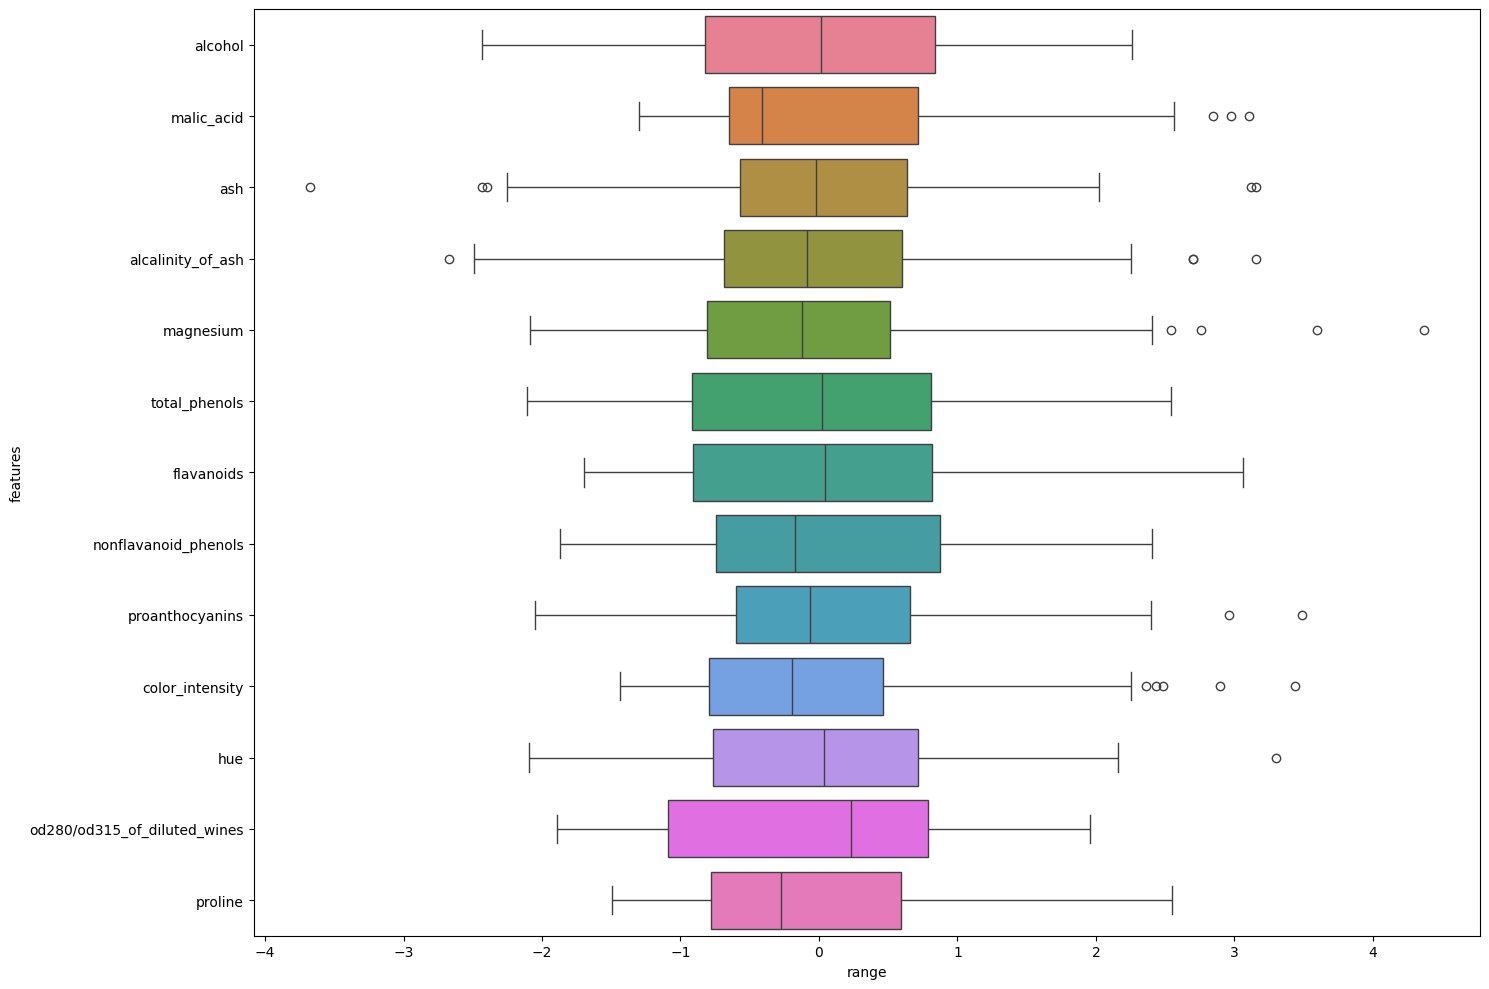

In [45]:
import seaborn as sns
fig,ax= plt.subplots(figsize= (15,10))
sns.boxplot(data = x_train, orient="h").set(xlabel= 'range',ylabel='features')
plt.tight_layout()

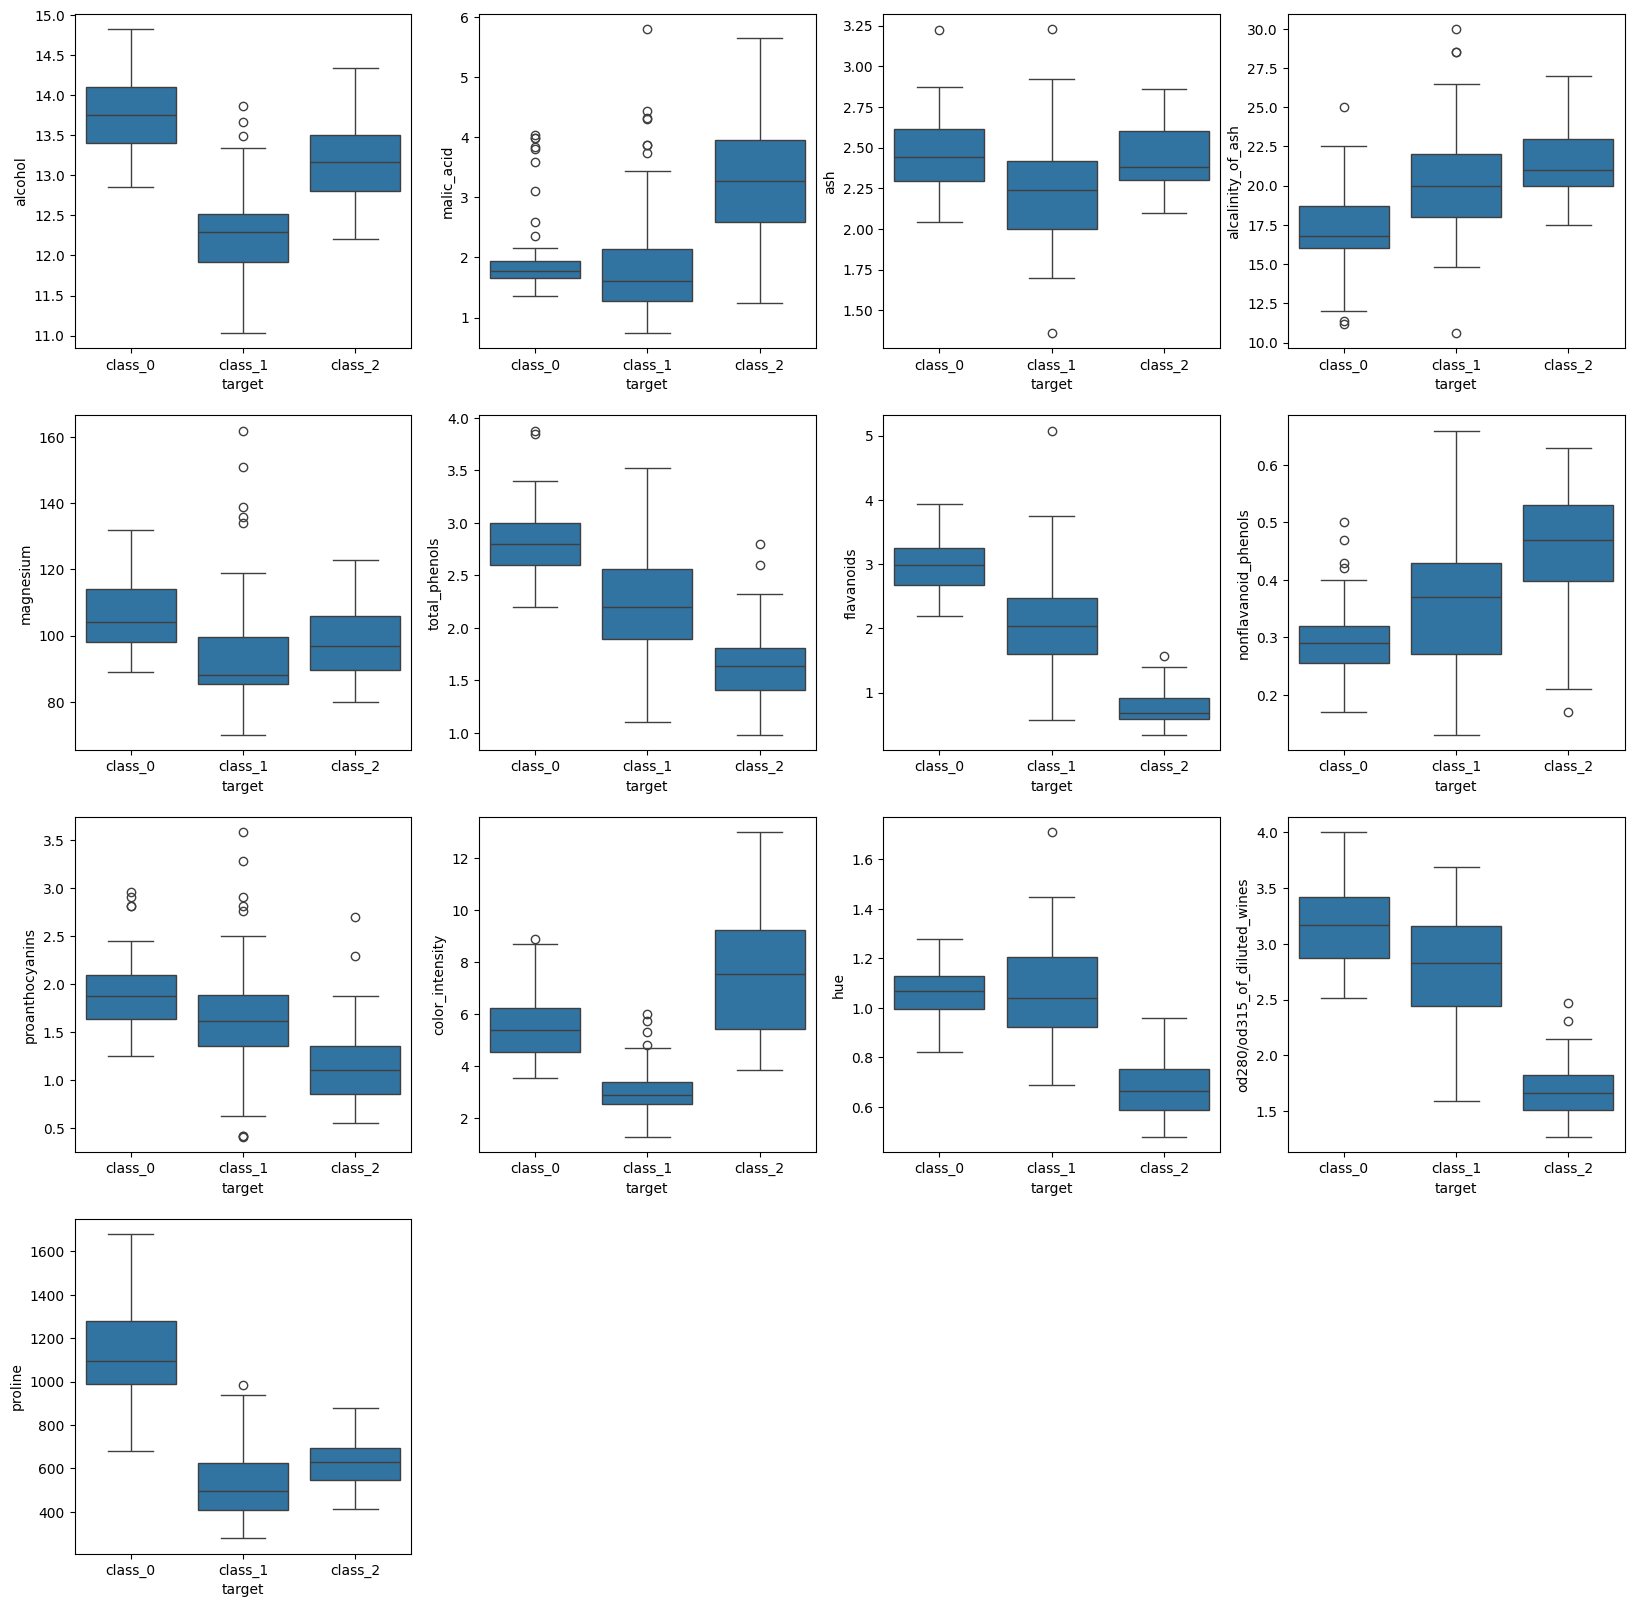

In [46]:
fig, axes = plt.subplots(4,4, figsize = (20,20))
for i, ax in enumerate(axes.flat):
    if i<13:
        sns.boxplot(data=df,x='target', y=df.columns[i],ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [47]:
corr_mat = Train_data.corr(method='pearson')
corr_mat

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.055796,0.210046,-0.320004,0.217917,0.278724,0.216268,-0.085053,0.138966,0.519946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malic_acid,0.055796,1.000000,0.192373,0.304390,-0.122404,-0.320007,-0.402826,0.344370,-0.201422,0.253540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ash,0.210046,0.192373,1.000000,0.466770,0.237305,0.120319,0.110967,0.244765,-0.005865,0.255982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcalinity_of_ash,-0.320004,0.304390,0.466770,1.000000,-0.108426,-0.300902,-0.340408,0.396773,-0.207839,0.028916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magnesium,0.217917,-0.122404,0.237305,-0.108426,1.000000,0.209067,0.191892,-0.249180,0.239194,0.151114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_phenols,0.278724,-0.320007,0.120319,-0.300902,0.209067,1.000000,0.849231,-0.420714,0.603498,-0.066604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flavanoids,0.216268,-0.402826,0.110967,-0.340408,0.191892,0.849231,1.000000,-0.511011,0.640968,-0.208439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nonflavanoid_phenols,-0.085053,0.344370,0.244765,0.396773,-0.249180,-0.420714,-0.511011,1.000000,-0.340449,0.216410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proanthocyanins,0.138966,-0.201422,-0.005865,-0.207839,0.239194,0.603498,0.640968,-0.340449,1.000000,-0.009833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color_intensity,0.519946,0.253540,0.255982,0.028916,0.151114,-0.066604,-0.208439,0.216410,-0.009833,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


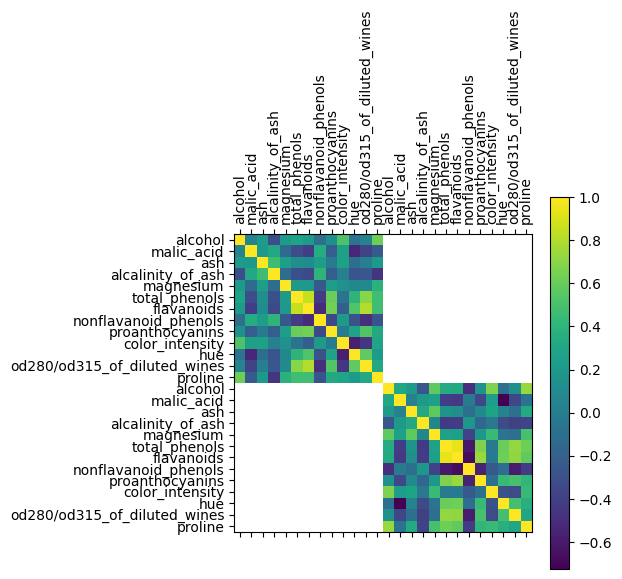

In [48]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns,rotation = 90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

In [52]:
if isinstance(x_test, pd.Series):
    x_test = x_test.to_frame()  # Converts Series to DataFrame
print(type(x_test))
if isinstance(x_train, pd.Series):
    x_test = x_train.to_frame()  # Converts Series to DataFrame
print(type(x_train))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [60]:
Train_data.drop(['flavanoids'],axis=1,inplace=True)
x_train.drop(['flavanoids'],axis=1,inplace=True)
x_test.drop(['flavanoids'],axis=1 ,inplace=True)

KeyError: "['flavanoids'] not found in axis"